<a href="https://colab.research.google.com/github/erenakgunduz/Probability_Statistics/blob/main/ErenAkgunduz_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Midterm Project
## Eren Akgunduz

Directions:

*   Use any and all resources available to you
*   Comment and explain the code
*   Answer the questions to the best of your abilities
*   There are no points for pain: ask for help

Save this notebook to your GitHub and submit the link.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Getting your data

Create a google form to input your data.
Follow the same method as [Lab 5](https://colab.research.google.com/drive/1zYvyhrz2wVnJXlZqj_PpxOxplfS3LN9Y?usp=sharing).

[My form link](https://docs.google.com/forms/d/e/1FAIpQLSfGnbHl5kwjE8DeS8al4e58LIa7eAtG8E2ApzATO-Z7Ky5GxQ/viewform?usp=sf_link)

In [2]:
import pandas as pd
def get_database(url): # This function loads the google spreadsheet
    url_head = "https://docs.google.com/spreadsheets/d/"
    url_foot = "/gviz/tq?tqx=out:csv&sheet="
    url_body = url.split('/')[5]
    sheet_name = "1"
    url_csv = url_head + url_body + url_foot + sheet_name
    df = pd.read_csv(url_csv, sep=',', skiprows=0)
    return df

Put your form url here:

In [3]:
url = "https://docs.google.com/spreadsheets/d/1pZarcxluqZ_HH8NaGR1MsUClQEzv3CHgtVy7esK4HCA/edit?usp=sharing"

In [4]:
data = get_database(url)

In [5]:
data = np.array(data)  # now our data is in a format that numpy understands (all inside an array)
print(data, data.shape)  # Misha added the last one to see how much it would improve the fit

[['10/20/2022 7:43:16' 'Shaving mug' 32.0 10.15]
 ['10/20/2022 7:43:49' 'Candle lid' 30.0 9.7]
 ['10/20/2022 7:44:15' 'Coffee bean container lid' 50.8 16.4]
 ['10/20/2022 14:35:00' '3decimal' 3.141 1.0]] (4, 4)


In [6]:
circumferences = data[:,2]  # slice in a way that gives me all (wildcard) in the first dimension (each entry), but only the data with index 2 (the circumferences)
diameters = data[:,3]  # same but now for index 3 (diameters)
print(circumferences, diameters)  # proving it worked the way we want

[32.0 30.0 50.8 3.141] [10.15 9.7 16.4 1.0]


Plot your data points

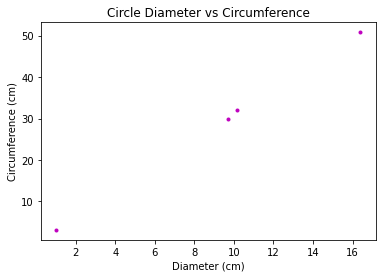

In [7]:
plt.title("Circle Diameter vs Circumference")

plt.xlabel("Diameter (cm)")
plt.ylabel("Circumference (cm)")

plt.plot(diameters, circumferences, 'm.'); # circumferences (y) as a function of diameters (x), magenta dots/points 

## Part 2: Linear Fit

Follow the steps in the [Linear Fit notebook]() to run a linear fit on your data.

In [8]:
best_loss = 100000000
# Adjusting this can drastically change the run time due to this algorithm's complexity (O(n**2)), and yield interesting results
n = 1000  # The number of samples for np.linspace(), but it also represents the n in the big O notation
# For example, 5 * 5 = just 25 total iterations, takes no time at all, 1000**2 = a MILLION attempts, takes some waiting even here on Google's hardware

best_m = None
best_b = None

for m_guess in np.linspace(0, 20, n):  # level of iteration for guessing the slope (m)
    for b_guess in np.linspace(0, 20, n):  # for each guess of the slope, also go through guesses of the y-intercept (b)
        # it can seem pretty brute-force, but it does a great job in the end
        y_guess = m_guess * diameters + b_guess  # putting it all together -- this actually produces the y-estimate points & plot

        loss = np.sum((y_guess - circumferences)**2)  # how far off the mark we are

        if loss < best_loss:  # lower loss is better, so if a certain guess is the best one yet then update all the "bests"
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess


Plot the line of best fit:

Use blue dots for the collected data and a red line for the estimate.

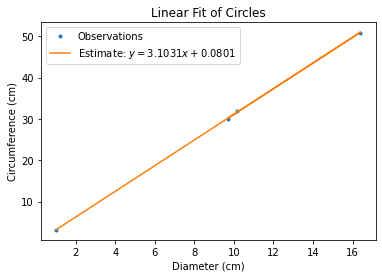

In [9]:
plt.title('Linear Fit of Circles')

plt.xlabel('Diameter (cm)')
plt.ylabel('Circumference (cm)')

# Plot the collected data
plt.plot(diameters, circumferences, '.', label='Observations')  # plot the points, remembering our x-axis (circumferences)

y_estimate = best_m * diameters + best_b  # the line of best fit, which uses the best m and b the algorithm was able to find

# Plot the line of best fit
plt.plot(diameters, y_estimate, label=f'Estimate: $y = {round(best_m, 4)} x + {round(best_b, 4)}$')  # rounding so the label doesn't take up the whole plot

plt.legend();

The estimated relationship is:

$C = 3.10D + 0.08$

## Part 3: Interpretation

Answer the questions in text cells

#### Question 1:

What do $m$ and $b$ represent in these equations?

In these equations, $m$ represents the slope of the line of best fit — or, in other words, the ratio by which $x$ and $y$ are related — and $b$ represents the y-intercept (the starting output when $x$ = 0)

#### Question 2:

Guess what the correct values $m$ and $b$ should be.

If we're to assume that what we've measured are *actually* perfect circles, and not just close enough for our perception as humans (in reality they could be/probably are slightly oblong/flawed), then *m* would have to be the exact value of ${\pi}$, because $C = 2{\pi}r$ for an ideal circle, which is the same as $C = {\pi}d$ (exactly what we've been dealing with). Since that would be enough to describe the relationship, $b$ could just be 0

#### Question 3:

Does it make sense to include $b$ in the parameters?

Assuming that this question is asking if it makes sense to include $b$ in the plt.plot() parameters, it does **not**, because we already account for $b$ when we define y_estimate (which represents the best line of fit we could come up with thus far), which is what we actually use as an argument

## Bonus:

These problems are extra credit. You may use any resources, but be sure to explain your code.

#### Bonus 1: Plot the squared errors from your line of best fit

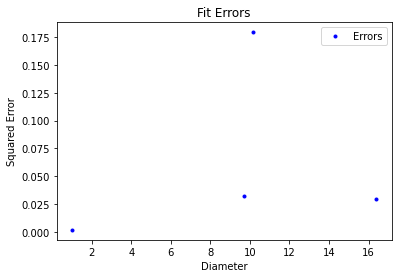

In [10]:
plt.title("Fit Errors")

plt.xlabel("Diameter")
plt.ylabel("Squared Error")

# Using comprehension syntax - the circumferences (actual points) and y-estimate (best fit points) already correspond
# So, I want to use the index to get the circumference we need and use the item for the y-estimate, that looks like this:
squared_errors = np.array([(circumferences[i] - y)**2 for i, y in enumerate(y_estimate)])

plt.plot(diameters, squared_errors, 'b.', label = "Errors")

plt.legend();

#### Bonus 2: Plot the errors as a histogram

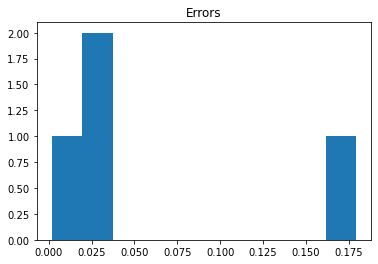

In [11]:
plt.title("Errors")
plt.hist(squared_errors)  # matplotlib's histogram method, displays frequency of data points' occurence (density, in this case of errors)
plt.show()

What distribution does this histogram look like?

Since we are looking at a histogram of errors (looking at all the densities can give us an idea of the probability density function at play), we would eventually expect to see a normal distribution — but I don't have too much data so it doesn't look like a normal distribution at the moment

#### Bonus 3: Find the circle with the largest error. 
Hint: use np.max

In [12]:
largest_error = np.max(squared_errors)  # as simple as that, but I'll still put this to the test

#### Bonus 4: Remove the circles with the 2 largest errors and run the fit again.


In [13]:
print(diameters, circumferences, y_estimate, squared_errors)  # what we start with

def remove_two_largest_errors(array):
    sort = np.argsort(squared_errors)  # the argsort() method allows us to set a sorting order and stick to it, here we base the sort on the squared errors
    print(squared_errors[~sort][0] == largest_error)  # tilde flips the order of the sort, so now the first item (index 0) should have the largest error, confirming it
    new_array = array[~sort]  # apply this reverse sort to the array that's passed in
    new_array = np.delete(new_array, np.s_[0:2])  # numpy delete with a slice of just the first two items (which have the largest errors)
    return new_array

diameters = remove_two_largest_errors(diameters)
circumferences = remove_two_largest_errors(circumferences)

print(diameters, circumferences)  # it works! :)

[10.15 9.7 16.4 1.0] [32.0 30.0 50.8 3.141] [31.576576576576574 30.180180180180177 50.97097097097096 3.183183183183183] [0.1792874  0.0324649  0.02923107 0.00177942]
True
True
[16.4 1.0] [50.8 3.141]


In [14]:
best_loss = 100000000
n = 1000

best_m = None
best_b = None

for m_guess in np.linspace(0, 20, n):
    for b_guess in np.linspace(0, 20, n):

        y_guess = m_guess * diameters + b_guess

        loss = np.sum((y_guess - circumferences)**2)

        if loss < best_loss:

            best_loss = loss
            best_m = m_guess
            best_b = b_guess

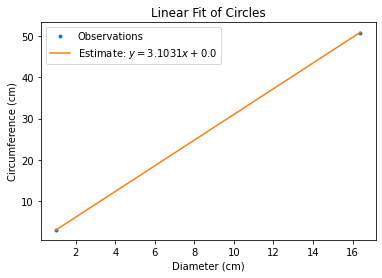

In [15]:
plt.title('Linear Fit of Circles')

plt.xlabel('Diameter (cm)')
plt.ylabel('Circumference (cm)')

# Plot the collected data
plt.plot(diameters, circumferences, '.', label='Observations')

y_estimate = best_m * diameters + best_b

# Plot the line of best fit
plt.plot(diameters, y_estimate, label=f'Estimate: $y = {round(best_m, 4)} x + {round(best_b, 4)}$')

plt.legend();

[16.4 1.0] [0.00826115 0.00143617]


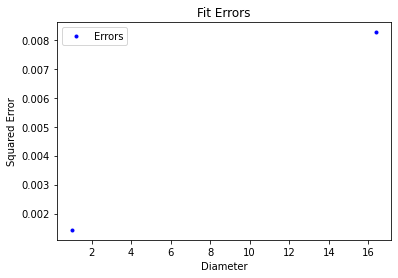

In [16]:
plt.title("Fit Errors")

plt.xlabel("Diameter")
plt.ylabel("Squared Error")

squared_errors = np.array([(circumferences[i] - y)**2 for i, y in enumerate(y_estimate)])

plt.plot(diameters, squared_errors, 'b.', label = "Errors")

print(diameters, squared_errors)  # let's also see the exact values of the points we're looking at
plt.legend();

What is the difference in your error?

In [17]:
0.02923107 - 0.00826115

0.020969920000000003

In [18]:
0.00177942 - 0.00143617

0.00034325

#### Bonus 5: Find and explain a better method of fitting this data

In [19]:
circumferences = np.array(data[:,2], dtype=float)  # the reason I do this is to keep the data type consistently float
diameters = np.array(data[:,3], dtype=float)  # if I don't do this, the next step will throw an error

[Followed these docs](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)

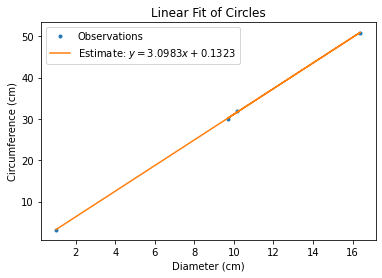

In [20]:
plt.title('Linear Fit of Circles')

plt.xlabel('Diameter (cm)')
plt.ylabel('Circumference (cm)')

# Plot the collected data
plt.plot(diameters, circumferences, '.', label='Observations')

# Here's numpy's very own method for finding line of best fit: linalg.lstsq()
# neat! because numpy is generally quite fast (unlike our method above) and trustable, can't really go wrong
A = np.vstack([diameters, np.ones(len(diameters))]).T  # by doing this we're just rewriting the line equation slightly
best_m, best_b = np.linalg.lstsq(A, circumferences, rcond=None)[0]  # this way, the method can do its magic
y_estimate = best_m * diameters + best_b  # if you noticed, this line and everything below has stayed exactly the same

# Plot the line of best fit
plt.plot(diameters, y_estimate, label=f'Estimate: $y = {round(best_m, 4)} x + {round(best_b, 4)}$')

plt.legend();